C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


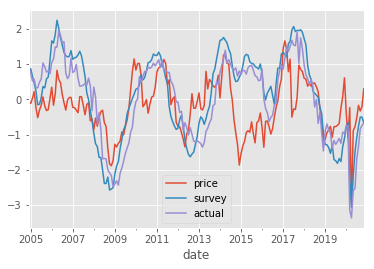

In [1]:
#####################做出 price survey real
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")


df=pd.read_excel('每月更新表格.xlsx', sheet_name ='EU',encoding='big5')
df['date'] = pd.to_datetime(df['date'],format='%Y-%m')
df.sort_values("date",inplace=True)
df=df.set_index(keys=['date'])
df=df['1994':]   #從1994的data開始

#變數YOY化
df['BFCIEU IndexYOY']=(df['BFCIEU Index']/df['BFCIEU Index'].shift(12))-1
df['SXXP IndexYOY']=(df['SXXP Index']/df['SXXP Index'].shift(12))-1
df['CO1 ComdtyYOY']=(df['CO1 Comdty']/df['CO1 Comdty'].shift(12))-1
df['CRY IndexYOY']=(df['CRY Index']/df['CRY Index'].shift(12))-1
df['EURUSD CurncyYOY']=(df['EURUSD Curncy']/df['EURUSD Curncy'].shift(12))-1
df['GECU10YR IndexYOY']=(df['GECU10YR Index']/df['GECU10YR Index'].shift(12))-1


#平滑
df['BFCIEU IndexYOY']=df['BFCIEU IndexYOY'].rolling(6).mean()



column_name=set(df.columns)  #轉成set
#30個月z-score化  
for variable in column_name: 
    df[variable]=(df[variable]-df[variable].rolling(30).mean())/df[variable].rolling(30).std()



#做出 price survey actual
df['price']=(df['BFCIEU IndexYOY']+2*df['SXXP IndexYOY']+df['CO1 ComdtyYOY']+df['CRY IndexYOY']+df['EURUSD CurncyYOY']+2*df['GECU10YR IndexYOY'])/8                     

df['survey']=(df['SNTEEUGX Index']+df['EUICEMU Index']+df['EUCCEMU Index']+df['EUESEMU Index']+df['GRZEEUEX Index']+df['GRZEEUCU Index']+df['EUSCEMU Index']+df['EUBCI Index'])/8   

df['actual']=(df['OEOEKLAC Index']+df['EUIPEMUY Index']+df['EMEMULYY Index']+df['RSWAEMUY Index']+df['EUGNEMUY Index']+df['ECCPEST Index'])/6


df=df.dropna()
df['月']=df.index.month


#計算上行&下行訊號
df['上行訊號']=0
df['下行訊號']=0
for i in range(0,len(df['上行訊號'])-1,1): 
        up1=(df['survey'].iloc[i]>df['survey'].iloc[i-1]) & (df['survey'].iloc[i-1]>df['survey'].iloc[i-2]) & (df['survey'].iloc[i-2]>df['survey'].iloc[i-3])  
        up2=(df['price'].iloc[i]>df['price'].iloc[i-1]) & (df['price'].iloc[i-1]>df['price'].iloc[i-2]) & (df['price'].iloc[i-2]>df['price'].iloc[i-3])
        down1=(df['survey'].iloc[i]<df['survey'].iloc[i-1]) & (df['survey'].iloc[i-1]<df['survey'].iloc[i-2]) & (df['survey'].iloc[i-2]<df['survey'].iloc[i-3])  
        down2=(df['price'].iloc[i]<df['price'].iloc[i-1]) & (df['price'].iloc[i-1]<df['price'].iloc[i-2]) & (df['price'].iloc[i-2]<df['price'].iloc[i-3])
  
        if (up1==True) & (up2==True):    
            df['上行訊號'].iloc[i]=1
        if (down1==True) & (down2==True):    
            df['下行訊號'].iloc[i]=-1    






rsp=df.loc[:, ['price' , 'survey','actual']]


#df.to_excel("EU現況dashboard產出.xlsx")


#名稱對照
dict = {'BFCIEU IndexYOY': 'EA financial index YOY', 
        'SXXP IndexYOY': '道瓊歐洲STOXX600指數 YOY',
        'CO1 ComdtyYOY': 'Brent YOY',
        'CRY IndexYOY': 'Commodities index YOY',
        'EURUSD CURNCYYOY': '歐元 YOY',
        'GECU10YR IndexYOY': 'Euro Generic Govt Bond 10 Year YOY',
        'SNTEEUGX Index': 'Sentix投資者信心',
        'EUICEMU Index': '歐元區產業信心指標',
        'EUCCEMU Index': '歐元區消費者信心指數',
        'EUESEMU Index': '歐元區經濟信心指標',
        'GRZEEUEX Index': '歐洲經濟研究中心(ZEW)歐元區',
        'GRZEEUCU Index': '歐洲經濟研究中心(ZEW)歐元區',
        'EUSCEMU Index': '歐元區服務業信心',
        'EUBCI Index': '企業景氣指標',
        'OEOEKLAC Index': '歐洲 OECD',
        'EUIPEMUY Index': '歐元區工業生產wda (年比)',
        'EMEMULYY Index': '歐元區就業率(年比)',
        'RSWAEMUY Index': '歐元區零售銷售(年比)',
        'EUGNEMUY Index': '歐元區GDP 經季調 (年比)',
        'ECCPEST Index': '歐元區 CPI預估 (年比)',
       }

rsp=df.loc[:, ['price' , 'survey','actual']]

rsp.plot()
#df.corr().to_excel("output.xlsx")

In [2]:
#####################做出dashboard

#price_column_name=['price','EA financial index YOY',,,,,,,]
#survey_column_name=['survey',]
#actual_column_name=['actual',]





rsp=df.loc[:, ['price' , 'survey','actual']]
table=df.drop(columns=['月'])
table=table.rank(pct=True, ascending=False)*100







#變異來源board    以百分比計算
change=(df.diff()/df.shift()).iloc[-1]

price_group=df.loc[:,['price','BFCIEU IndexYOY','SXXP IndexYOY','CO1 ComdtyYOY','CRY IndexYOY','EURUSD CurncyYOY','GECU10YR IndexYOY']]
survey_group=df.loc[:,['survey','SNTEEUGX Index','EUICEMU Index','EUCCEMU Index','EUESEMU Index','GRZEEUEX Index','GRZEEUCU Index','EUSCEMU Index','EUBCI Index']]
actual_group=df.loc[:,['actual','OEOEKLAC Index','EUIPEMUY Index','EMEMULYY Index','RSWAEMUY Index','EUGNEMUY Index','ECCPEST Index']]

price_group_change1=(price_group.diff()).iloc[-1]        #1個月
survey_group_change1=(survey_group.diff()).iloc[-1]
actual_group_change1=(actual_group.diff()).iloc[-1]

price_group_change3=(price_group.diff(3)).iloc[-1]        #3個月
survey_group_change3=(survey_group.diff(3)).iloc[-1]
actual_group_change3=(actual_group.diff(3)).iloc[-1]

price_group_change6=(price_group.diff(6)).iloc[-1]        #6個月
survey_group_change6=(survey_group.diff(6)).iloc[-1]
actual_group_change6=(actual_group.diff(6)).iloc[-1]

price_group_change12=(price_group.diff(12)).iloc[-1]        #12個月
survey_group_change12=(survey_group.diff(12)).iloc[-1]
actual_group_change12=(actual_group.diff(12)).iloc[-1]




#price_group_change1.loc['price']=(df['price']-df['price'].shift()).iloc[-1]    #修正total
#price_group_change3.loc['price']=(df['price']-df['price'].shift(3)).iloc[-1]
#price_group_change6.loc['price']=(df['price']-df['price'].shift(6)).iloc[-1]
#price_group_change12.loc['price']=(df['price']-df['price'].shift(12)).iloc[-1]
#
#survey_group_change1.loc['survey']=(df['survey']-df['survey'].shift()).iloc[-1]    #修正total
#survey_group_change3.loc['survey']=(df['survey']-df['survey'].shift(3)).iloc[-1]
#survey_group_change6.loc['survey']=(df['survey']-df['survey'].shift(6)).iloc[-1]
#survey_group_change12.loc['survey']=(df['survey']-df['survey'].shift(12)).iloc[-1]
#
#actual_group_change1.loc['actual']=(df['actual']-df['actual'].shift()).iloc[-1]    #修正total
#actual_group_change3.loc['actual']=(df['actual']-df['actual'].shift(3)).iloc[-1]
#actual_group_change6.loc['actual']=(df['actual']-df['actual'].shift(6)).iloc[-1]
#actual_group_change12.loc['actual']=(df['actual']-df['actual'].shift(12)).iloc[-1]




#產出所有 to excel
writer=pd.ExcelWriter('EU_現況dashboard.xlsx')

table.iloc[-1].to_excel(writer,'現況分數')
df.to_excel(writer,'個變數歷史明細')
price_group_change1.to_excel(writer,'變異',startrow=1,startcol=0)
survey_group_change1.to_excel(writer,'變異',startrow=1,startcol=3)
actual_group_change1.to_excel(writer,'變異',startrow=1,startcol=6)

price_group_change3.to_excel(writer,'變異',startrow=18,startcol=0)
survey_group_change3.to_excel(writer,'變異',startrow=18,startcol=3)
actual_group_change3.to_excel(writer,'變異',startrow=18,startcol=6)

price_group_change6.to_excel(writer,'變異',startrow=35,startcol=0)
survey_group_change6.to_excel(writer,'變異',startrow=35,startcol=3)
actual_group_change6.to_excel(writer,'變異',startrow=35,startcol=6)

price_group_change12.to_excel(writer,'變異',startrow=50,startcol=0)
survey_group_change12.to_excel(writer,'變異',startrow=50,startcol=3)
actual_group_change12.to_excel(writer,'變異',startrow=50,startcol=6)


writer.save()


#在excel中貼上標示
from openpyxl import load_workbook

wb = load_workbook('EU_現況dashboard.xlsx')
ws = wb['變異']
ws['A1'] = '1個月變異'
ws['A18'] = '3個月變異'
ws['A35'] = '6個月變異'
ws['A50'] = '12個月變異'
wb.save('EU_現況dashboard.xlsx')




In [15]:
'''
#####################granger causality test 
from statsmodels.tsa.stattools import grangercausalitytests


#grangercausalitytests(df[['actual', 'survey']], maxlag=20)
#grangercausalitytests(df[['actual', 'price']], maxlag=20)


#########################################################################################################

# diff (price + survey)
difference=df.diff().dropna()
difference['s+r']=difference['price']+difference['survey']
grangercausalitytests(difference[['actual', 's+r']], maxlag=3)
#grangercausalitytests(difference[['s+r', 'actual']], maxlag=10)

#小結論:price+survey對actual有顯著granger關係  , 反之明顯沒有
'''


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.0959 , p=0.0000  , df_denom=172, df_num=1
ssr based chi2 test:   chi2=23.4988 , p=0.0000  , df=1
likelihood ratio test: chi2=22.0495 , p=0.0000  , df=1
parameter F test:         F=23.0959 , p=0.0000  , df_denom=172, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.5934 , p=0.0000  , df_denom=169, df_num=2
ssr based chi2 test:   chi2=25.9319 , p=0.0000  , df=2
likelihood ratio test: chi2=24.1724 , p=0.0000  , df=2
parameter F test:         F=12.5934 , p=0.0000  , df_denom=169, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.8428  , p=0.0002  , df_denom=166, df_num=3
ssr based chi2 test:   chi2=21.3941 , p=0.0001  , df=3
likelihood ratio test: chi2=20.1711 , p=0.0002  , df=3
parameter F test:         F=6.8428  , p=0.0002  , df_denom=166, df_num=3


{1: ({'ssr_ftest': (23.0959331051703, 3.3424021112611882e-06, 172.0, 1),
   'ssr_chi2test': (23.498769147702337, 1.2499370656323435e-06, 1),
   'lrtest': (22.049461948021133, 2.657141546703921e-06, 1),
   'params_ftest': (23.095933105170317, 3.34240211126115e-06, 172.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (12.593376211950131, 7.977566860106308e-06, 169.0, 2),
   'ssr_chi2test': (25.931922613956484, 2.3385924960572406e-06, 2),
   'lrtest': (24.172362307780645, 5.636872576911537e-06, 2),
   'params_ftest': (12.593376211950133, 7.977566860106308e-06, 169.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (6.84280732442885, 0.000224628849696885, 166.0, 3),
   'ssr_chi2test': (21.394078321557668, 8.718836501265327e-05, 3),
   'lrtest': (20.17107958574377, 0.00015643331533549097, 3),
   'params_ftest': (6.84280732442884, 0.0002246288496968869, 166.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0

In [28]:
'''
#####################回測 survey+price 連3個月往上,   actual??

rsp=df.loc[:, ['price' , 'survey','actual']]


rsp['actual+6']=rsp['actual'].shift(-6)-rsp['actual']


con1=(rsp['survey']>rsp['survey'].shift()) & (rsp['survey'].shift()>rsp['survey'].shift(2))# & (rsp['survey'].shift(2)>rsp['survey'].shift(3))  
con2=(rsp['price']>rsp['price'].shift()) & (rsp['price'].shift()>rsp['price'].shift(2)) #& (rsp['price'].shift(2)>rsp['price'].shift(3))
#con3=rsp['survey']<0
#con4=rsp['price']<0
#con5=rsp['actual']<0
print(rsp[con1&con2])

'''

               price    survey    actual  actual+6
date                                              
2005-07-29 -0.012707  0.049224  0.554388  0.584327
2005-08-31  0.291584  0.367876  1.023033  0.192347
2005-12-30  0.177356  1.108115  0.828918  0.936830
2006-01-31  0.573003  1.663387  1.138716  0.429419
2006-04-28  1.145672  2.244773  1.452093 -0.867652
2008-12-31 -2.019471 -2.504157 -2.486124  0.783698
2009-01-30 -1.277993 -2.119396 -2.394305  0.902807
2009-08-31 -0.741063 -0.410196 -1.329963  1.368093
2009-09-30 -0.307423 -0.256910 -1.184023  1.852761
2009-10-30  0.392177 -0.118221 -0.888734  1.391676
2009-11-30  1.060561  0.023705 -0.745947  1.404753
2009-12-31  1.531370  0.145317 -0.271710  1.066666
2010-03-31  1.353072  0.399865  0.668738  0.220628
2010-07-30 -0.006911  0.805974  0.796791  0.218362
2010-10-29  0.089698  1.124985  0.922286  0.173340
2010-11-30  0.127257  1.284746  1.025946 -0.230068
2013-01-31  0.025240 -0.684787 -1.176686  0.589559
2013-12-31  0.751401  1.399314 

In [29]:
'''
#####################回測 survey+price 連3個月往下,   actual??

rsp=df.loc[:, ['price' , 'survey','actual']]


rsp['actual+6']=rsp['actual'].shift(-6)-rsp['actual']


con1=(rsp['survey']<rsp['survey'].shift()) & (rsp['survey'].shift()<rsp['survey'].shift(2)) #& (rsp['survey'].shift(2)<rsp['survey'].shift(3))  
con2=(rsp['price']<rsp['price'].shift()) & (rsp['price'].shift()<rsp['price'].shift(2)) #& (rsp['price'].shift(2)<rsp['price'].shift(3))
#con3=rsp['survey']>0
#con4=rsp['price']>0
#con5=rsp['actual']>0
print(rsp[con1&con2])
'''

               price    survey    actual  actual+6
date                                              
2005-05-31 -0.479468 -0.145478  0.283255  0.503097
2006-06-30  0.645089  1.735046  1.765749 -0.583246
2006-07-31  0.180786  1.541426  1.568134 -0.804108
2006-08-31 -0.135196  1.329951  1.598197 -0.816890
2006-09-29 -0.426131  1.233321  0.780832  0.159704
2007-08-31 -0.796798  0.649179  0.424978 -0.409284
2008-08-29 -1.325251 -2.388733 -1.704186 -0.586068
2011-07-29  0.549695  0.448095  0.718498 -0.852653
2012-05-31 -1.528904 -1.168337 -0.641084 -0.534559
2014-05-30  1.825216  1.605995  1.048286 -0.429038
2014-06-30  1.750116  1.415416  1.122030 -0.331634
2014-07-31  0.795232  1.301805  0.969813 -0.268910
2014-08-29  0.328707  0.953812  0.849141 -0.038185
2014-09-30 -0.784964  0.658650  0.802033  0.007284
2014-10-31 -1.273789  0.505147  0.847139 -0.167867
2015-09-30 -1.748321  0.935016  0.652852 -1.228828
2016-02-29 -1.910974  0.198062 -0.350106  0.328509
2018-01-31  0.537820  1.722122 